# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [139]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares (takster)
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [140]:
import pandas as pd
import pyarrow.parquet as pq
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [141]:
df_yellow.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         21.95                   2.5          0.0  
1                    0.3         13.30                   0.0          0.0  
2                    0.3         10.56                   0.0          0.0  
3                    0.3         11.80                   2.5          0.0  
4                    0.3         30.30                   2.5          0.0

In [142]:
df_green.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          3.5   0.50      0.5        0.00           0.0      None   
1          9.5   0.50      0.5        0.00           0.0      None   
2         14.5   3.25      0.5        4.60           0.0      None   
3          8.0   0.50      0.5        0.00           0.0      None   
4         22.0   0.50      0.5        5.21           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          4.80           2.0        1.0   
1                    0.3         10.80           2.0        1.0   
2                    0.3         23.15           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                    0.3         31.26           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

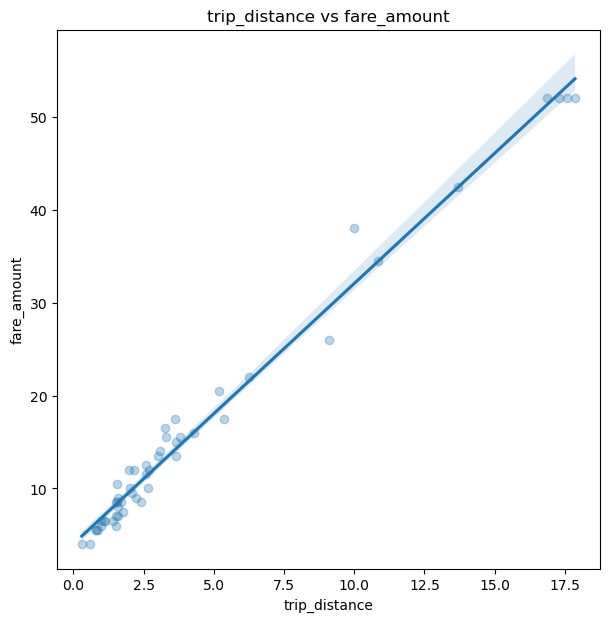

In [143]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [144]:
df_yellow=df_yellow[df_yellow.passenger_count>0]

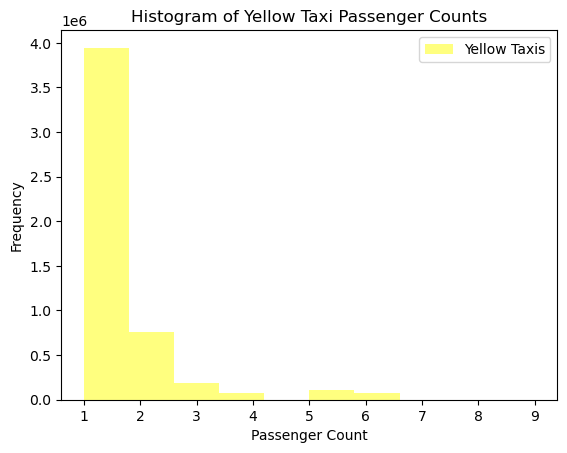

In [145]:
import matplotlib.pyplot as plt

# Plotting yellow taxi passenger counts
plt.hist(df_yellow.passenger_count, bins=10, alpha=0.5, color='yellow', label='Yellow Taxis')

# Adding labels and a legend
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Yellow Taxi Passenger Counts')
plt.legend()

# Displaying the histogram
plt.show()

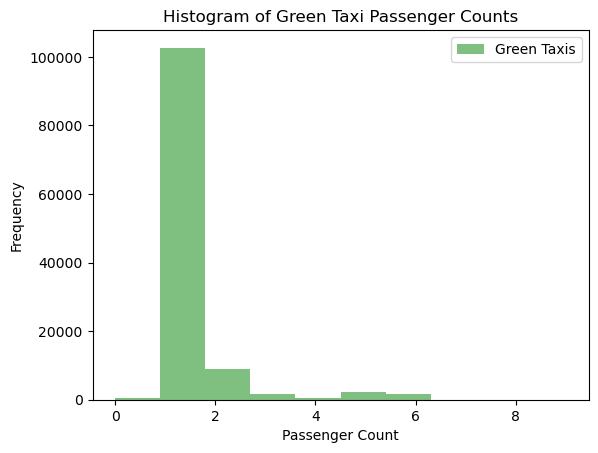

In [146]:
# Plotting green taxi passenger counts
plt.hist(df_green.passenger_count, bins=10, alpha=0.5, color='green', label='Green Taxis')

# Adding labels and a legend
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Green Taxi Passenger Counts')
plt.legend()

# Displaying the histogram
plt.show()

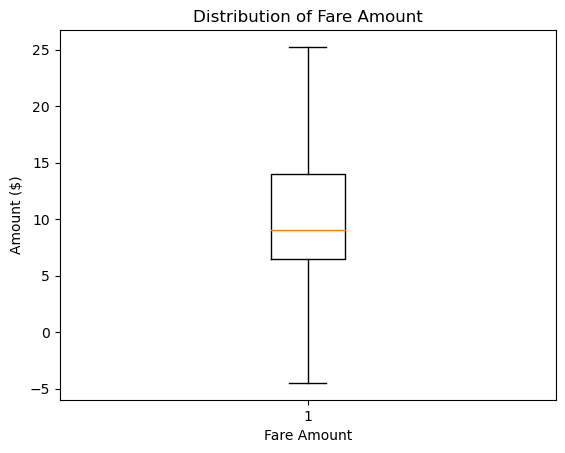

In [147]:
import matplotlib.pyplot as plt

plt.boxplot(df_yellow['fare_amount'],sym='')
plt.xlabel('Fare Amount')
plt.ylabel('Amount ($)')
plt.title('Distribution of Fare Amount')
plt.show()

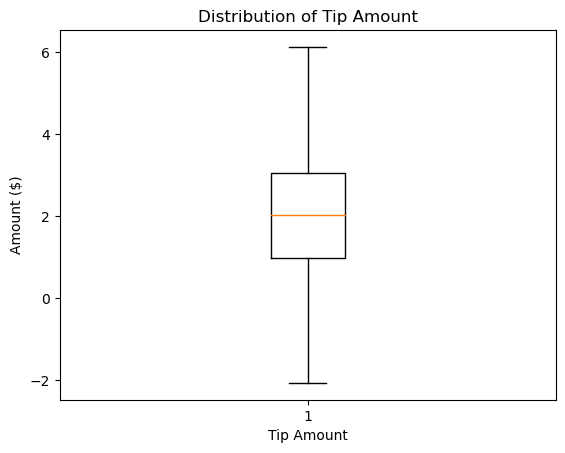

In [148]:
import matplotlib.pyplot as plt

plt.boxplot(df_yellow['tip_amount'], sym='')
plt.xlabel('Tip Amount')
plt.ylabel('Amount ($)')
plt.title('Distribution of Tip Amount')
plt.show()



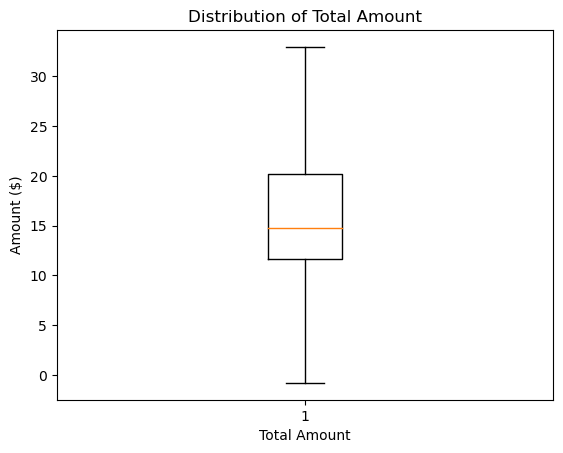

In [149]:
import matplotlib.pyplot as plt

plt.boxplot(df_yellow['total_amount'], sym='')
plt.xlabel('Total Amount')
plt.ylabel('Amount ($)')
plt.title('Distribution of Total Amount')
plt.show()

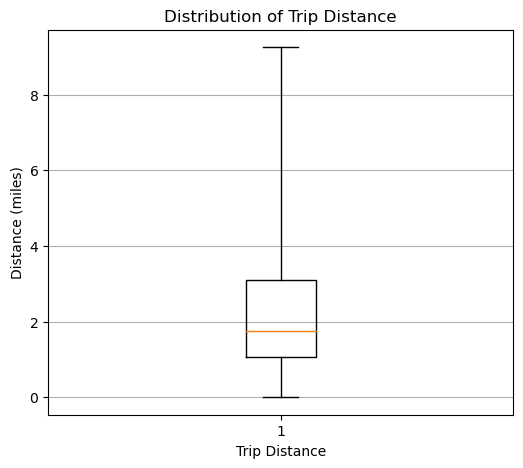

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))  # Adjust the size as needed
plt.boxplot(df_yellow['trip_distance'], sym='', whis=3)

plt.xlabel('Trip Distance')
plt.ylabel('Distance (miles)')
# Tilføj gridlines for at tydeliggøre kvartiler
plt.grid(True, axis='y')
plt.title('Distribution of Trip Distance')
plt.show()

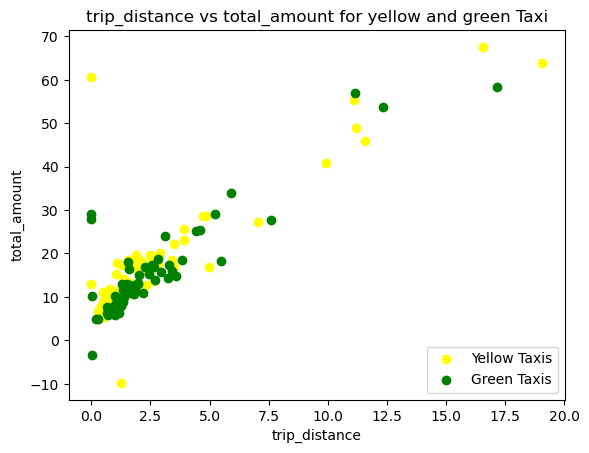

In [151]:
import matplotlib.pyplot as plt

def create_scatterplot(df1, df2, x_col, y_col, title, xlabel, ylabel):
    # Scatter plot for yellow taxis
    plt.scatter(df1[x_col], df1[y_col], color='yellow', label='Yellow Taxis')
    
    # Scatter plot for green taxis
    plt.scatter(df2[x_col], df2[y_col], color='green', label='Green Taxis')

    # Adding labels and a legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Displaying the scatter plot
    plt.show()

# Example usage
create_scatterplot(
    df_yellow.sample(65), 
    df_green.sample(65), 
    x_col='trip_distance', 
    y_col='total_amount', 
    title='trip_distance vs total_amount for yellow and green Taxi', 
    xlabel='trip_distance',
    ylabel='total_amount',
)

In [152]:
# Converting colons to datetime-format for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

# Calculating trip duration by subtracting pickup-time and dropoff-time
# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_green['trip_duration'] = (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds()

# Converting colons to datetime-format for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])

# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_yellow['trip_duration'] = (df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds()

In [153]:
df_green_sample = df_green.sample(90)
df_green_sample=df_green_sample[df_green_sample.trip_duration < 2000]
df_green_sample=df_green_sample[df_green_sample.trip_distance < 100]
df_green_sample=df_green_sample[df_green_sample.tip_amount>0]

df_yellow_sample = df_yellow.sample(90)
df_yellow_sample=df_yellow_sample[df_yellow_sample.trip_duration < 2000]
df_yellow_sample=df_yellow_sample[df_yellow_sample.trip_distance < 100]
df_yellow_sample=df_yellow_sample[df_yellow_sample.tip_amount>0]


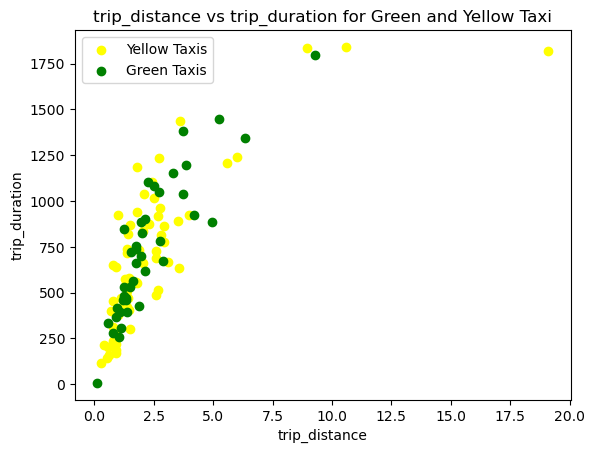

In [154]:
def create_scatterplot(df1, df2, x_col, y_col, title, xlabel, ylabel):
    # Scatter plot for yellow taxis
    plt.scatter(df1[x_col], df1[y_col], color='yellow', label='Yellow Taxis')

    # Scatter plot for green taxis
    plt.scatter(df2[x_col], df2[y_col], color='green', label='Green Taxis')

    # Adding labels and a legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Displaying the scatter plot
    plt.show()

# Example usage
create_scatterplot(
    df_yellow_sample,
    df_green_sample,
    x_col='trip_distance',
    y_col='trip_duration',
    title='trip_distance vs trip_duration for Green and Yellow Taxi',
    xlabel='trip_distance',
    ylabel='trip_duration',
)

In [155]:
# remove negative outliers 
df_yellow = df_yellow[df_yellow.tip_amount>0]
negative_tip_rows = df_green[df_green["tip_amount"] < 0]

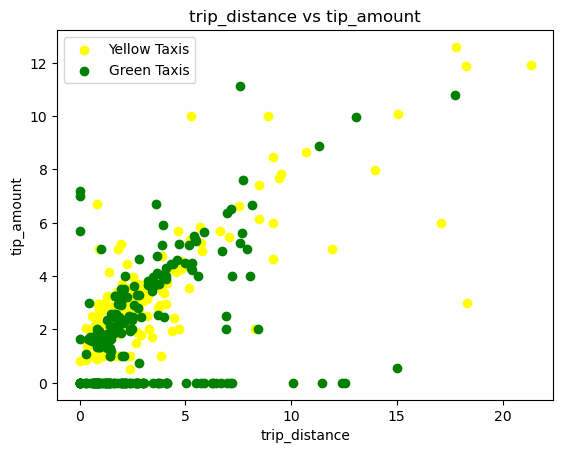

In [156]:
#Scatterplot for green and yellow Taxi's
import matplotlib.pyplot as plt
import pandas as pd

def create_scatterplot(df1, df2, x_col, y_col, title, xlabel, ylabel):
    # Scatter plot for yellow taxis
    plt.scatter(df1[x_col], df1[y_col], color='yellow', label='Yellow Taxis')

    # Scatter plot for green taxis
    plt.scatter(df2[x_col], df2[y_col], color='green', label='Green Taxis')

    # Adding labels and a legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Displaying the scatter plot
    plt.show()

# Example usage
create_scatterplot(
    df_yellow.sample(230),
    df_green.sample(230),
    x_col='trip_distance',
    y_col='tip_amount',
    title='trip_distance vs tip_amount',
    xlabel='trip_distance',
    ylabel='tip_amount',
)

In [157]:
df_green = df_green.sample(1000)
df_green = df_green[df_green.tip_amount>=0]
df_green =df_green[df_green.payment_type>=0] #filtrer fordi one payment type was nan, empty. So we removed it. 

df_yellow = df_yellow.sample(1000)
df_yellow = df_yellow[df_yellow.tip_amount>=0]
df_yellow =df_yellow[df_yellow.payment_type>=0] #filtrer fordi one payment type was nan, empty. So we removed it. 

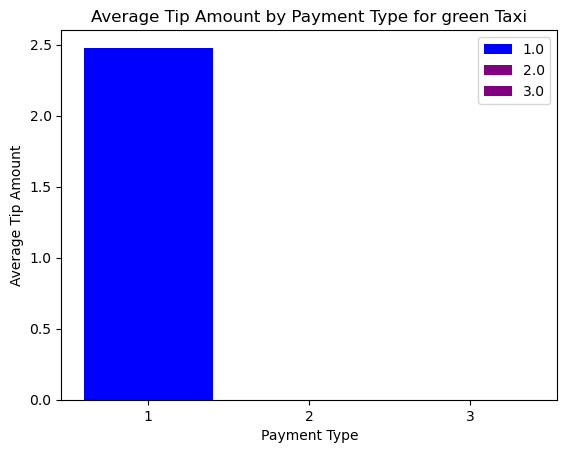

In [158]:

import matplotlib.pyplot as plt

# Grupper data efter payment type og beregn gennemsnittet af tip amount for hver gruppe
grouped_data = df_green.groupby('payment_type')['tip_amount'].mean()

# Opret en liste over farver/mønstre for hver betalingstype
colors = ['b', 'g', 'c', 'r', 'p']

# Plot gennemsnittet af tip amount for hver payment type
fig, ax = plt.subplots()
for i, payment_type in enumerate(grouped_data.index):
    tip_amount = grouped_data[payment_type]
    if tip_amount == 0:
        ax.bar(payment_type, tip_amount, color='purple')
    else:
        ax.bar(payment_type, tip_amount, color=colors[i % len(colors)])

ax.set_xlabel('Payment Type')
ax.set_ylabel('Average Tip Amount')
ax.set_title('Average Tip Amount by Payment Type for green Taxi')
ax.set_xticks(grouped_data.index)
ax.legend(grouped_data.index)

plt.show()



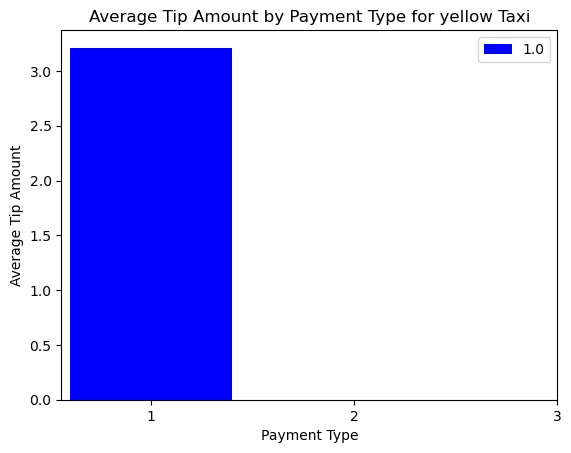

In [159]:
# Grupper data efter payment type og beregn gennemsnittet af tip amount for hver gruppe
grouped_data1 = df_yellow.groupby('payment_type')['tip_amount'].mean()

# Opret en liste over farver/mønstre for hver betalingstype
colors = ['b', 'g', 'c', 'r', 'p']

# Plot gennemsnittet af tip amount for hver payment type
fig, ax = plt.subplots()
for i, payment_type in enumerate(grouped_data1.index):
    tip_amount = grouped_data1[payment_type]
    if tip_amount == 0:
        ax.bar(payment_type, tip_amount, color='purple')
    else:
        ax.bar(payment_type, tip_amount, color=colors[i % len(colors)])

ax.set_xlabel('Payment Type')
ax.set_ylabel('Average Tip Amount')
ax.set_title('Average Tip Amount by Payment Type for yellow Taxi')
ax.set_xticks(grouped_data.index)
ax.legend(grouped_data.index)

plt.show()



In [160]:
print(df_green['payment_type'].value_counts())

1.0    536
2.0    345
3.0      6
Name: payment_type, dtype: int64


In [161]:
print(df_yellow['payment_type'].value_counts())

1    1000
Name: payment_type, dtype: int64


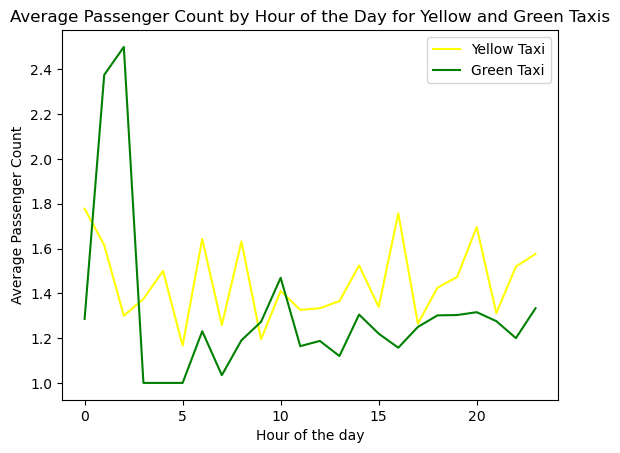

In [162]:
#Passenger counts 
#1. Creating Line plot that displays passenger count by hour of the day

# Calculating trip duration for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_yellow['trip_duration'] = df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']
df_yellow['trip_duration_minutes'] = df_yellow['trip_duration'].dt.total_seconds() / 60
grouped_data_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Calculating trip duration for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])
df_green['trip_duration'] = df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']
df_green['trip_duration_minutes'] = df_green['trip_duration'].dt.total_seconds() / 60
grouped_data_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

#Plotting the average passenger counts for both yellow and green taxis on the same graph
plt.plot(grouped_data_yellow.index, grouped_data_yellow.values, color='yellow', label='Yellow Taxi')
plt.plot(grouped_data_green.index, grouped_data_green.values, color='green', label='Green Taxi')
plt.xlabel('Hour of the day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day for Yellow and Green Taxis')
plt.legend()
plt.show()



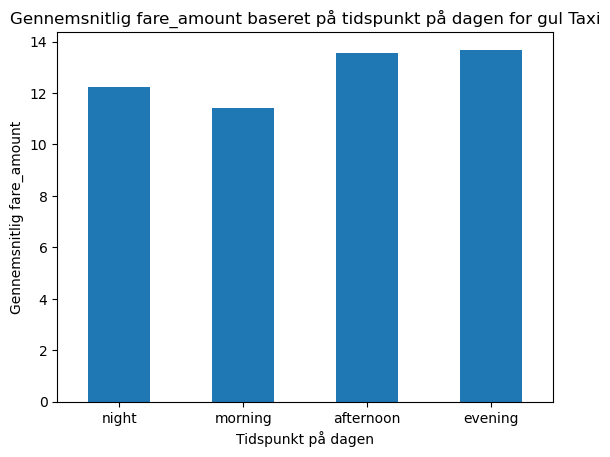

In [163]:
import matplotlib.pyplot as plt

# Konverter pick up_time til datetime-format
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Opret en ny kategori for tidspunkt på dagen (morgen, eftermiddag, aften, nat)
df_yellow['time_category'] = pd.cut(df_yellow['tpep_pickup_datetime'].dt.hour,
 bins=[0, 6, 12, 18, 24],
 labels=['night', 'morning', 'afternoon', 'evening'],
 right=False)

# Grupper data efter tidspunkt på dagen og beregn gennemsnitlig fare_amount
fare_by_time = df_yellow.groupby('time_category')['fare_amount'].mean()

# Lav en søjlediagram for at visualisere gennemsnitlig fare_amount baseret på tidspunkt på dagen
fare_by_time.plot(kind='bar', rot=0)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount baseret på tidspunkt på dagen for gul Taxi')
plt.show()

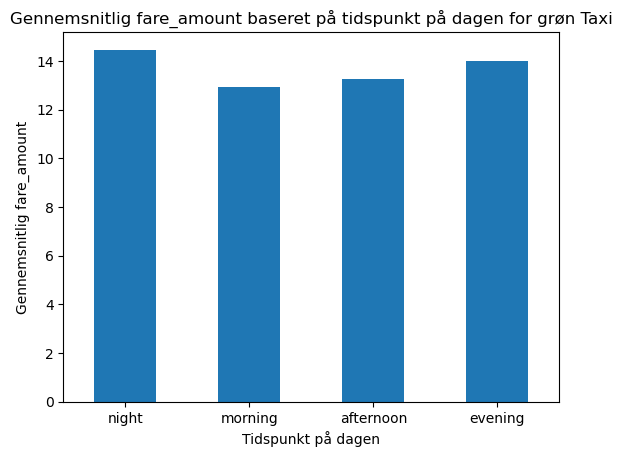

In [164]:
import matplotlib.pyplot as plt

# Konverter pick up_time til datetime-format
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Opret en ny kategori for tidspunkt på dagen (morgen, eftermiddag, aften, nat)
df_green['time_category'] = pd.cut(df_green['lpep_pickup_datetime'].dt.hour,
 bins=[0, 6, 12, 18, 24],
 labels=['night', 'morning', 'afternoon', 'evening'],
 right=False)

# Grupper data efter tidspunkt på dagen og beregn gennemsnitlig fare_amount
fare_by_time = df_green.groupby('time_category')['fare_amount'].mean()

# Lav en søjlediagram for at visualisere gennemsnitlig fare_amount baseret på tidspunkt på dagen
fare_by_time.plot(kind='bar', rot=0)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount baseret på tidspunkt på dagen for grøn Taxi')
plt.show()

In [165]:
print(df_yellow['payment_type'].value_counts())
df_yellow[df_yellow['payment_type'].notna()]
df_yellow =df_yellow[df_yellow.fare_amount>0]

1    1000
Name: payment_type, dtype: int64


In [166]:
print(df_green['payment_type'].value_counts())
df_green[df_green['payment_type'].notna()]
df_green =df_green[df_green.fare_amount>0]

1.0    536
2.0    345
3.0      6
Name: payment_type, dtype: int64


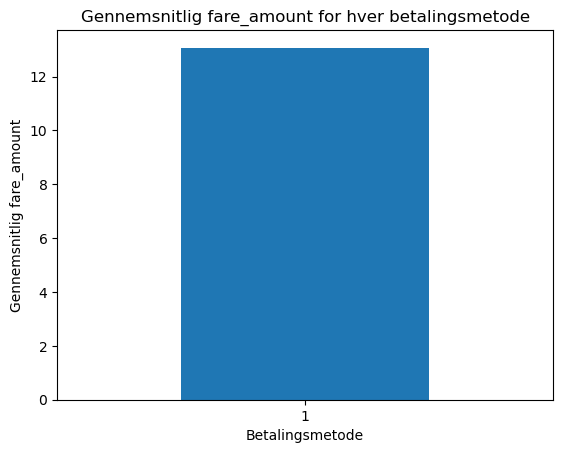

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Lav en søjlediagram for at visualisere fare_amount for hver betalingsmetode
df_yellow.groupby('payment_type')['fare_amount'].mean().plot(kind='bar', rot=0)

plt.xlabel('Betalingsmetode')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount for hver betalingsmetode')

plt.show()

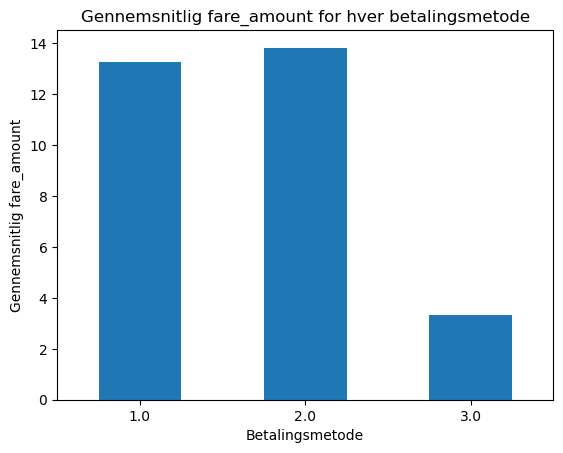

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Lav en søjlediagram for at visualisere fare_amount for hver betalingsmetode
df_green.groupby('payment_type')['fare_amount'].mean().plot(kind='bar', rot=0)

plt.xlabel('Betalingsmetode')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount for hver betalingsmetode')

plt.show()

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [169]:
df_zones.head(5)

Shape_Leng  Shape_Area                     zone  LocationID        borough  \
0    0.116357    0.000782           Newark Airport           1            EWR   
1    0.433470    0.004866              Jamaica Bay           2         Queens   
2    0.084341    0.000314  Allerton/Pelham Gardens           3          Bronx   
3    0.043567    0.000112            Alphabet City           4      Manhattan   
4    0.092146    0.000498            Arden Heights           5  Staten Island   

         lat        lng  
0  40.689516 -74.176786  
1  40.625724 -73.826126  
2  40.865888 -73.849479  
3  40.724152 -73.977023  
4  40.550340 -74.189930

In [170]:
df_yellow_sample_3 = df_yellow[(df_yellow.tpep_pickup_datetime > '2022-02-01 10:00:00') & (df_yellow.tpep_pickup_datetime < '2022-02-28 12:00:00')]

df_green_sample_4 = df_green[(df_green.lpep_pickup_datetime > '2022-02-01 10:00:00') & (df_green.lpep_pickup_datetime < '2022-02-28 12:00:00')]

In [171]:
df_yellow_sample_3.shape

(536, 22)

In [172]:
df_green_sample_4.shape

(427, 23)

In [173]:
pd.merge(df_yellow_sample_3, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('yellow_taxi.csv', index=False)

pd.merge(df_green_sample_4, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('green_taxi.csv', index=False)

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

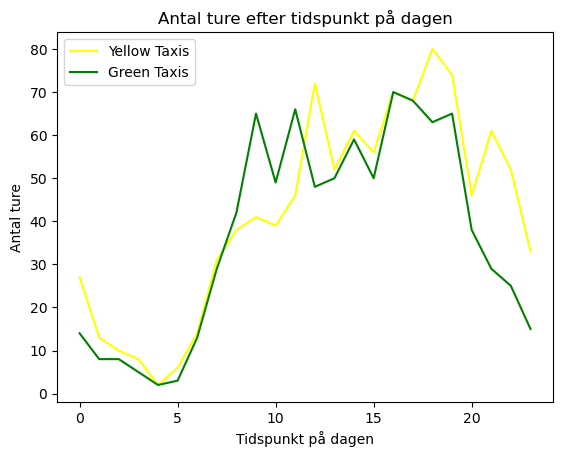

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data fra dine DataFrames (f.eks. df_yellow og df_green) og de relevante kolonner (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

# Analyser antallet af ture efter tidspunkt på dagen for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

# Lav et linjediagram for at vise antallet af ture efter tidspunkt på dagen for både yellow og green taxis
plt.plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter tidspunkt på dagen')
plt.legend()

plt.show()

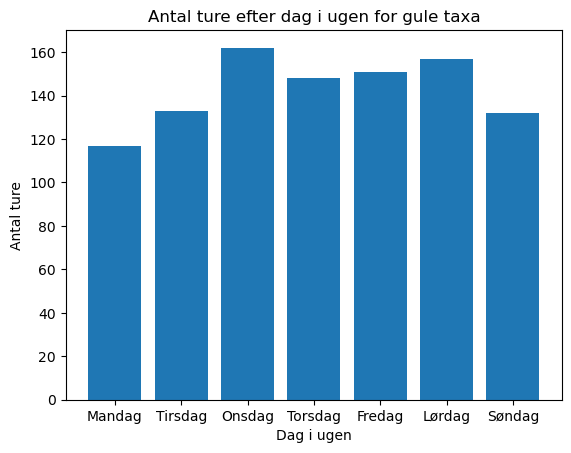

In [175]:
# Analyser antallet af ture efter dag i ugen
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
rides_by_day = df_yellow['day_of_week'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter dag i ugen
plt.bar(rides_by_day.index, rides_by_day.values)
plt.xlabel('Dag i ugen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter dag i ugen for gule taxa')
plt.xticks(range(7), ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])
plt.show()

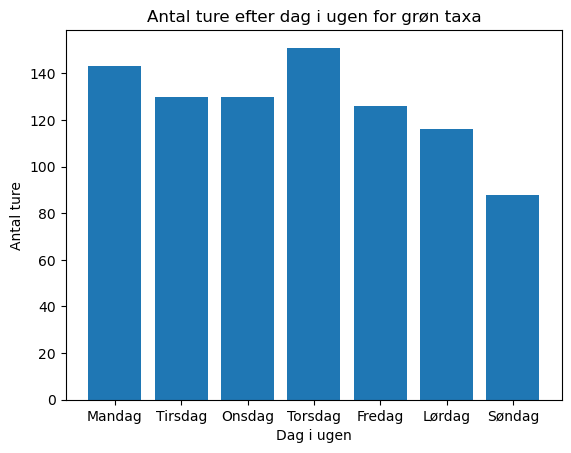

In [176]:
# Analyser antallet af ture efter dag i ugen
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
rides_by_day = df_green['day_of_week'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter dag i ugen
plt.bar(rides_by_day.index, rides_by_day.values)
plt.xlabel('Dag i ugen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter dag i ugen for grøn taxa')
plt.xticks(range(7), ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])
plt.show()

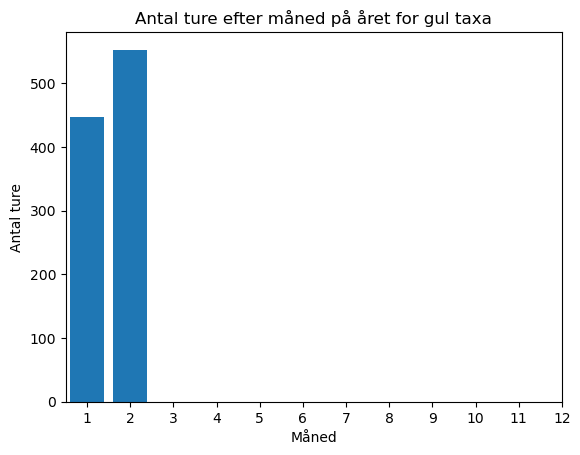

In [177]:
# Analyser antallet af ture efter måned på året
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month
rides_by_month = df_yellow['month'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter måned på året
plt.bar(rides_by_month.index, rides_by_month.values)
plt.xlabel('Måned')
plt.ylabel('Antal ture')
plt.title('Antal ture efter måned på året for gul taxa')
plt.xticks(range(1, 13))
plt.show()

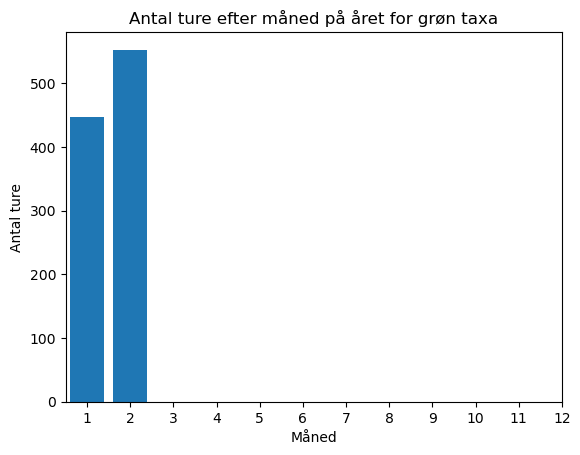

In [178]:
# Analyser antallet af ture efter måned på året
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month
rides_by_month1 = df_green['month'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter måned på året
plt.bar(rides_by_month1.index, rides_by_month.values)
plt.xlabel('Måned')
plt.ylabel('Antal ture')
plt.title('Antal ture efter måned på året for grøn taxa')
plt.xticks(range(1, 13))
plt.show()

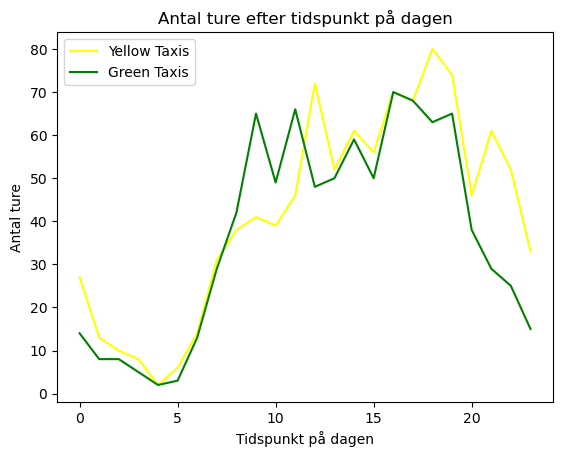

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data fra dine DataFrame for yellow taxis (f.eks. df_yellow) og de relevante kolonner (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

# Indlæs data fra dine DataFrame for green taxis (f.eks. df_green) og de relevante kolonner (pick up time, trip distance, fare)
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

# Lav et linjediagram for at vise antallet af ture efter tidspunkt på dagen for både yellow og green taxis
plt.plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter tidspunkt på dagen')
plt.legend()

plt.show()

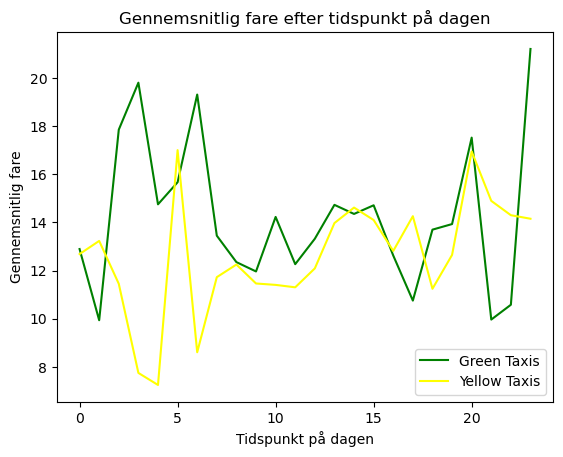

In [190]:
# Analyser forholdet mellem tidsmæssige mønstre og fare for green taxis
avg_fare_by_hour_green = df_green.groupby('hour_of_day')['fare_amount'].mean()

# Analyser forholdet mellem tidsmæssige mønstre og fare for yellow taxis
avg_fare_by_hour_yellow = df_yellow.groupby('hour_of_day')['fare_amount'].mean()

# Lav et linjediagram for at vise den gennemsnitlige fare efter tidspunkt på dagen for både green og yellow taxis
plt.plot(avg_fare_by_hour_green.index, avg_fare_by_hour_green.values, color='green', label='Green Taxis')
plt.plot(avg_fare_by_hour_yellow.index, avg_fare_by_hour_yellow.values, color='yellow', label='Yellow Taxis')

plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare')
plt.title('Gennemsnitlig fare efter tidspunkt på dagen')
plt.legend()

plt.show()

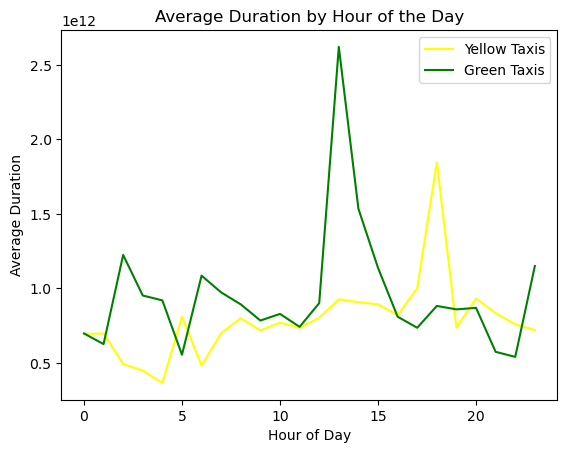

In [191]:
# Analyze the average duration by hour of the day for yellow taxis
avg_duration_by_hour_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Analyze the average duration by hour of the day for green taxis
avg_duration_by_hour_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Create a line plot to visualize the average duration by hour of the day for both yellow and green taxis
plt.plot(avg_duration_by_hour_yellow.index, avg_duration_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(avg_duration_by_hour_green.index, avg_duration_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Hour of the Day')
plt.legend()

plt.show()

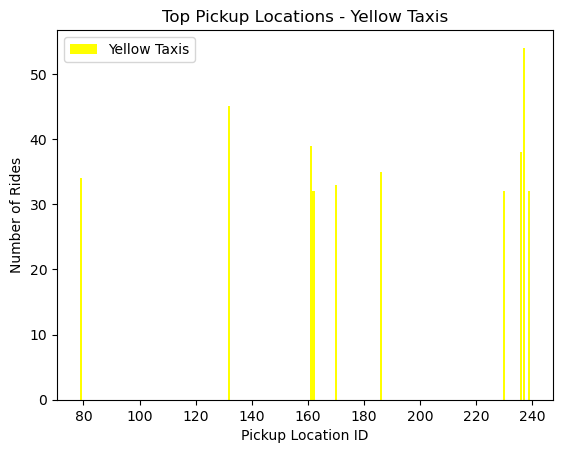

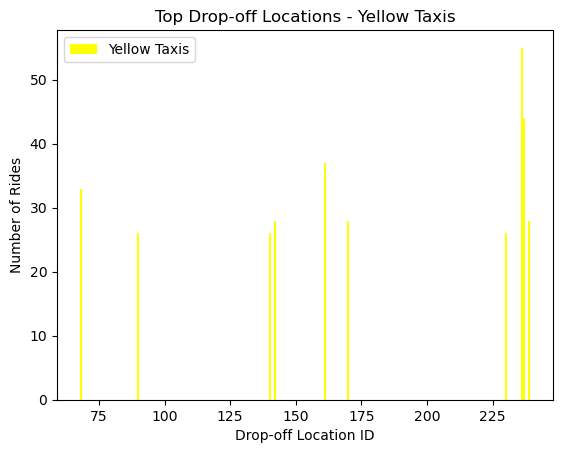

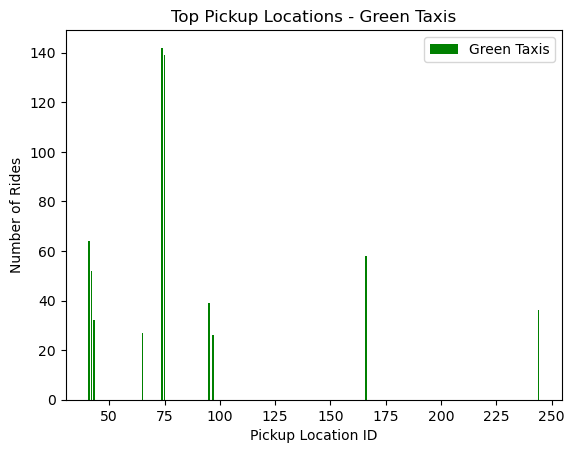

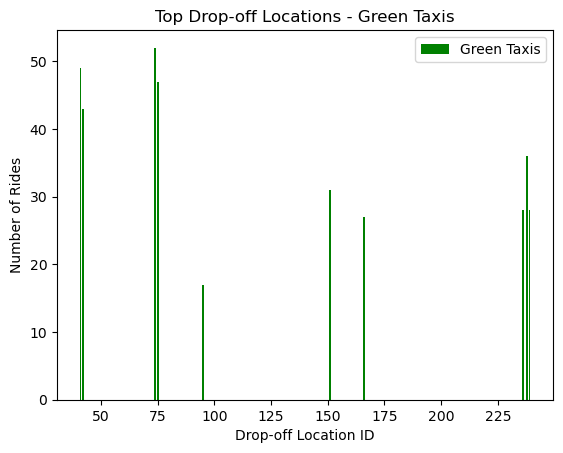

In [192]:
# Top pickup locations for yellow taxis
top_yellow_pickup_locations = df_yellow['PULocationID'].value_counts().nlargest(10)
# Top drop-off locations for yellow taxis
top_yellow_dropoff_locations = df_yellow['DOLocationID'].value_counts().nlargest(10)

# Top pickup locations for green taxis
top_green_pickup_locations = df_green['PULocationID'].value_counts().nlargest(10)
# Top drop-off locations for green taxis
top_green_dropoff_locations = df_green['DOLocationID'].value_counts().nlargest(10)

# Create bar plots to visualize the top pickup locations for yellow taxis
plt.bar(top_yellow_pickup_locations.index, top_yellow_pickup_locations.values, color='yellow', label='Yellow Taxis')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Rides')
plt.title('Top Pickup Locations - Yellow Taxis')
plt.legend()
plt.show()

# Create bar plots to visualize the top drop-off locations for yellow taxis
plt.bar(top_yellow_dropoff_locations.index, top_yellow_dropoff_locations.values, color='yellow', label='Yellow Taxis')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Number of Rides')
plt.title('Top Drop-off Locations - Yellow Taxis')
plt.legend()
plt.show()

# Create bar plots to visualize the top pickup locations for green taxis
plt.bar(top_green_pickup_locations.index, top_green_pickup_locations.values, color='green', label='Green Taxis')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Rides')
plt.title('Top Pickup Locations - Green Taxis')
plt.legend()
plt.show()

# Create bar plots to visualize the top drop-off locations for green taxis
plt.bar(top_green_dropoff_locations.index, top_green_dropoff_locations.values, color='green', label='Green Taxis')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Number of Rides')
plt.title('Top Drop-off Locations - Green Taxis')
plt.legend()
plt.show()

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [183]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [184]:
start_date = pd.to_datetime('2022-01-01 00:00:08')
end_date = pd.to_datetime('2022-12-31')
df_yellow = df_yellow[(df_yellow['tpep_pickup_datetime'] >= start_date) & (df_yellow['tpep_pickup_datetime'] <= end_date)]


In [185]:
from prophet import Prophet
import pandas as pd
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()


df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['number_of_rides'] = 1

# Opret en gruppebaseret dataframe ved at akkumulere antallet af ture pr. uge
df_ForecastedYellow = df_yellow.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='W'))['number_of_rides'].sum().reset_index()
#df_ForecastYellow = df_yellow[['tpep_pickup_datetime', 'number_of_rides']].sample(100)
#pd.Grouper: pakke fra panda som giver mig en særlig gruppering. 
#freq at det skal være i uger
#sum summerer number of rides på hver uge
#reset.index, så df ikke får nyt index iforhold til de her datetimes. 

df_ForecastedYellow = df_ForecastedYellow.rename(columns={'tpep_pickup_datetime': 'ds', 'number_of_rides': 'y'})




In [186]:
df_ForecastedYellow

ds    y
0 2022-01-02   20
1 2022-01-09   87
2 2022-01-16  102
3 2022-01-23  107
4 2022-01-30  120
5 2022-02-06  127
6 2022-02-13  142
7 2022-02-20  136
8 2022-02-27  138
9 2022-03-06   21

17:47:28 - cmdstanpy - INFO - Chain [1] start processing
17:47:38 - cmdstanpy - INFO - Chain [1] done processing


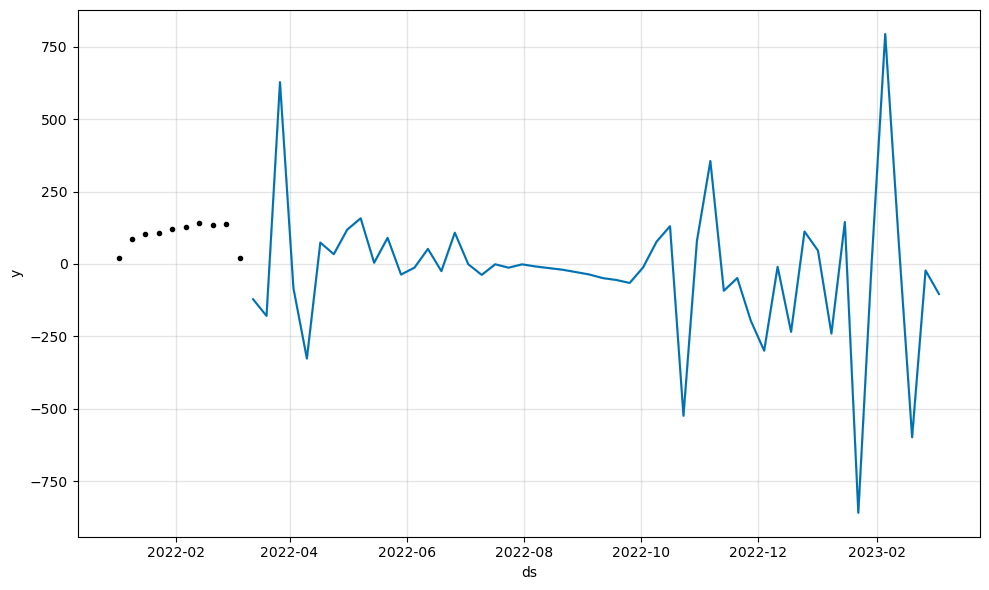

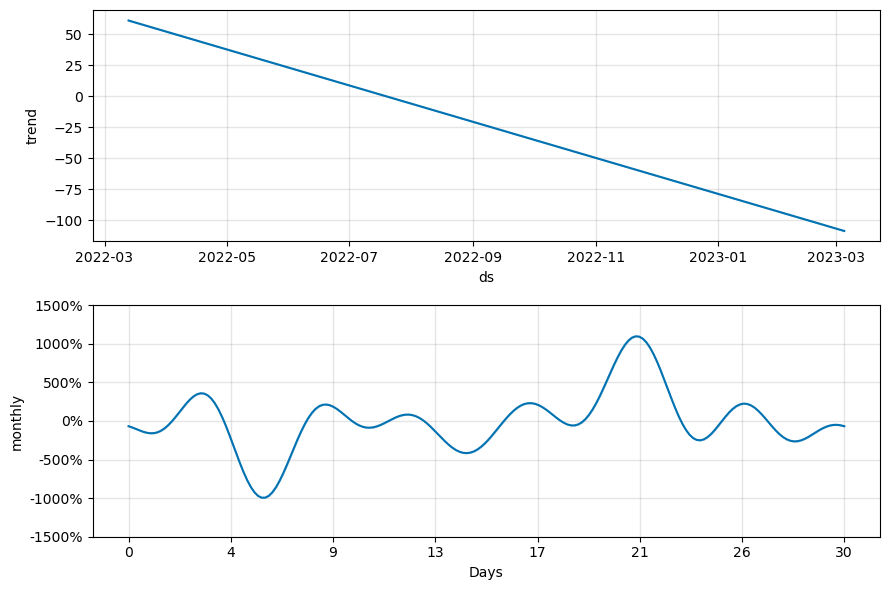

In [187]:
import matplotlib.pyplot as plt

model = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale=0.05, changepoint_range=0.9)
model.add_seasonality(name='monthly', period=30, fourier_order=8)  # Example of adding weekly seasonality

model.fit(df_ForecastedYellow)

future = model.make_future_dataframe(periods=52, freq='W',  include_history=False)    
# Definer antallet af fremtidige tidspunkter, du vil forudsige 


forecast = model.predict(future)

model.plot(forecast,uncertainty=True)

model.plot_components(forecast)

plt.show()



### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.